In [15]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/apurw/OneDrive/Documents/Data Glacier/Project _ Heathcare/Data/Healthcare_dataset.xlsx'
df = pd.read_excel(file_path)

# Display basic information and first few rows of the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

(None,
   Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
 0   P1       Persistent    Male      Caucasian  Not Hispanic     West   
 1   P2   Non-Persistent    Male          Asian  Not Hispanic     West   
 2   P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
 3   P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
 4   P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
 
   Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
 0        >75  GENERAL PRACTITIONER              Others   
 1      55-65  GENERAL PRACTITIONER              Others   
 2      65-75  GENERAL PRACTITIONER              Others   
 3        >75  GENERAL PRACTITIONER              Others   
 4        >75  GENERAL PRACTITIONER              Others   
 
        Ntm_Speciality_Bucket  ... Risk_Family_History_Of_Osteoporosis  \
 0  OB/GYN/Others/PCP/Unknown  ...                                   N   
 1  OB/GYN/Others/PCP/Unknown  ...         

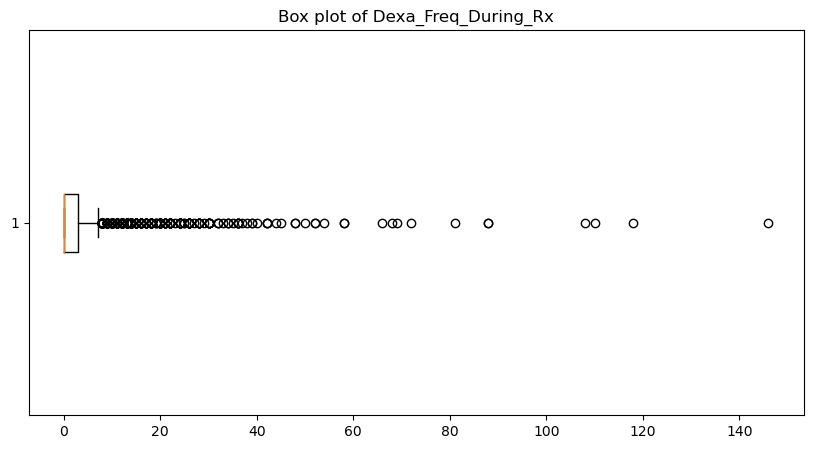

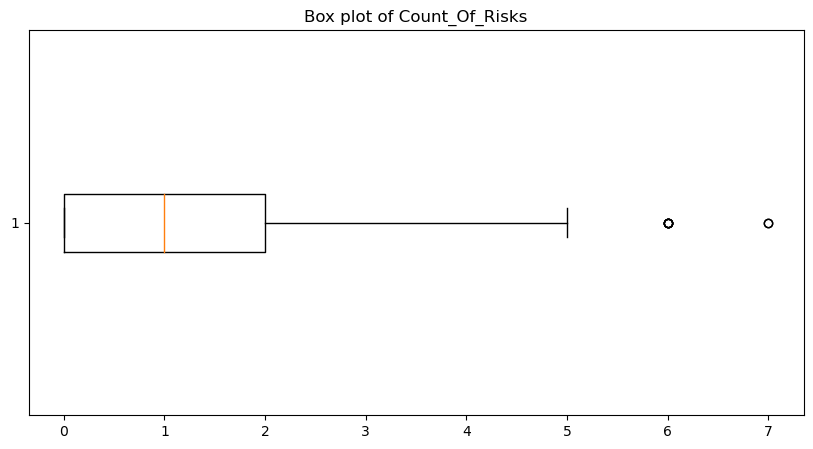

In [37]:
import matplotlib.pyplot as plt

# Create box plots for numerical columns
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Box plot of {col}')
    plt.show()


In [38]:

from scipy import stats

# Z-score method to handle outliers
df_zscore = df_mean_imputed.copy()
threshold = 3
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    z_scores = stats.zscore(df_zscore[col])
    abs_z_scores = abs(z_scores)
    outliers = (abs_z_scores > threshold)
    df_zscore.loc[outliers, col] = df_zscore[col].mean()


In [30]:
# IQR method to handle outliers
df_iqr = df_mode_imputed.copy()

for col in numeric_cols:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df_iqr[col] < lower_bound) | (df_iqr[col] > upper_bound))
    df_iqr.loc[outliers, col] = df_iqr[col].median()


In [31]:
# Checking for remaining outliers
zscore_outliers_count = (abs(stats.zscore(df_zscore[numeric_cols])) > threshold).sum()
iqr_outliers_count = (((df_iqr[numeric_cols] < lower_bound) | (df_iqr[numeric_cols] > upper_bound)).sum())

print("Outliers count after Z-score method:")
print(zscore_outliers_count)
print("\nOutliers count after IQR method:")
print(iqr_outliers_count)


Outliers count after Z-score method:
Dexa_Freq_During_Rx    83
Count_Of_Risks          0
dtype: int64

Outliers count after IQR method:
Dexa_Freq_During_Rx    200
Count_Of_Risks           0
dtype: int64


In [34]:
# Print outliers for Z-score method
print("\nOutliers identified by Z-score method:")
for col in numeric_cols:
    z_scores = stats.zscore(df_zscore[col])
    abs_z_scores = abs(z_scores)
    outliers = df_zscore[abs_z_scores > threshold]
    if not outliers.empty:
        print(f"\nColumn: {col}")
        print(outliers[[col]])



Outliers identified by Z-score method:

Column: Dexa_Freq_During_Rx
      Dexa_Freq_During_Rx
32                   20.0
65                   20.0
101                  25.0
116                  18.0
186                  21.0
...                   ...
2960                 24.0
3058                 22.0
3100                 17.0
3236                 22.0
3382                 26.0

[83 rows x 1 columns]


In [35]:
# Print outliers for IQR method
print("\nOutliers identified by IQR method:")
for col in numeric_cols:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_iqr[(df_iqr[col] < lower_bound) | (df_iqr[col] > upper_bound)]
    if not outliers.empty:
        print(f"\nColumn: {col}")
        print(outliers[[col]])



Outliers identified by IQR method:

Column: Dexa_Freq_During_Rx
      Dexa_Freq_During_Rx
6                       2
20                      7
27                      3
30                      5
31                      2
...                   ...
3389                    7
3391                    7
3394                    4
3412                    6
3421                    7

[476 rows x 1 columns]


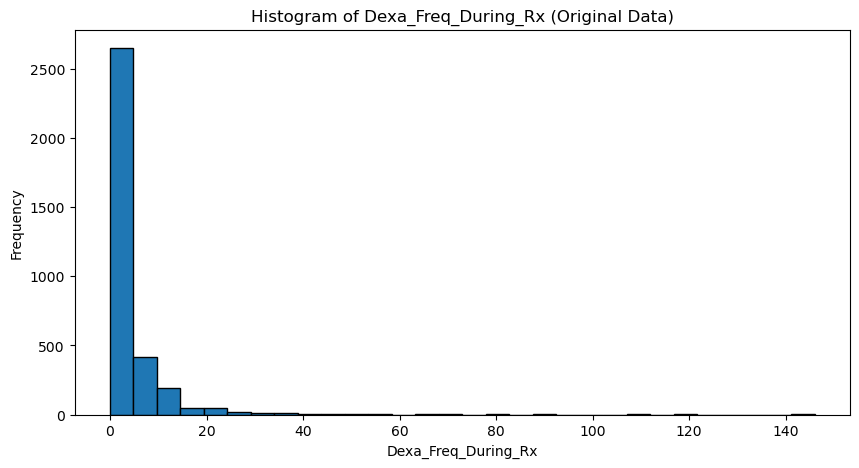

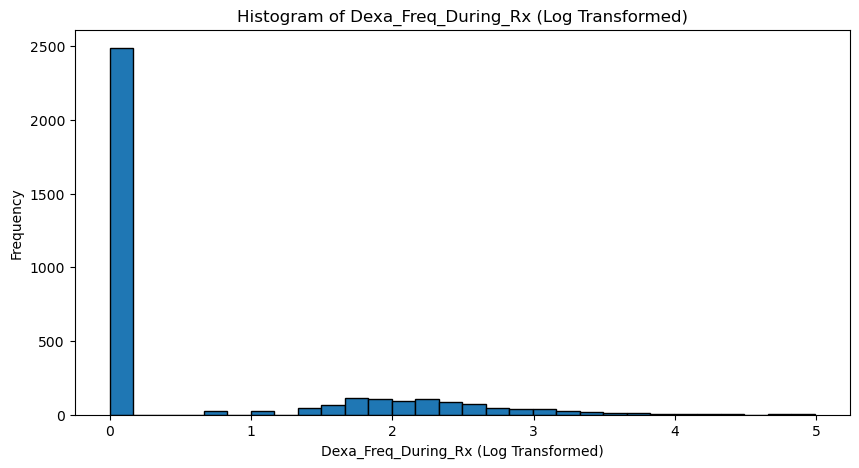

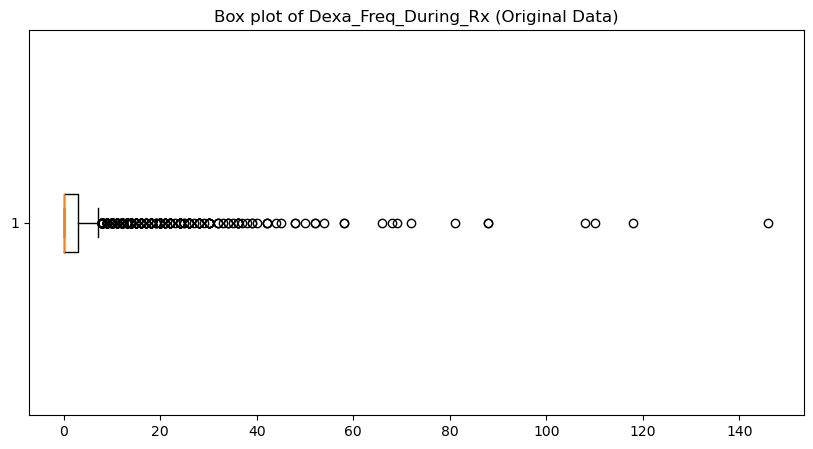

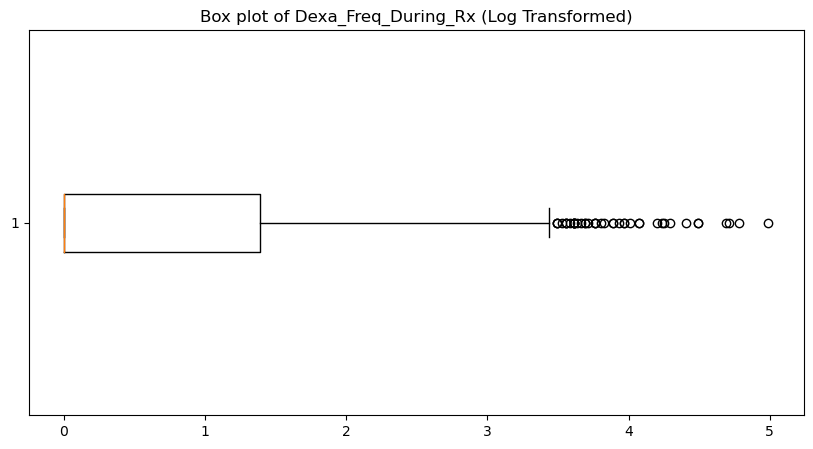

In [28]:
import numpy as np
# Applying log transformation to 'Dexa_Freq_During_Rx' column
df_mean_imputed['Dexa_Freq_During_Rx_log'] = np.log1p(df_mean_imputed['Dexa_Freq_During_Rx'])

# Visualizing original data distribution
plt.figure(figsize=(10, 5))
plt.hist(df_mean_imputed['Dexa_Freq_During_Rx'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Dexa_Freq_During_Rx (Original Data)')
plt.xlabel('Dexa_Freq_During_Rx')
plt.ylabel('Frequency')
plt.show()

# Visualizing log-transformed data distribution
plt.figure(figsize=(10, 5))
plt.hist(df_mean_imputed['Dexa_Freq_During_Rx_log'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Dexa_Freq_During_Rx (Log Transformed)')
plt.xlabel('Dexa_Freq_During_Rx (Log Transformed)')
plt.ylabel('Frequency')
plt.show()

# Box plot before transformation
plt.figure(figsize=(10, 5))
plt.boxplot(df_mean_imputed['Dexa_Freq_During_Rx'].dropna(), vert=False)
plt.title('Box plot of Dexa_Freq_During_Rx (Original Data)')
plt.show()

# Box plot after log transformation
plt.figure(figsize=(10, 5))
plt.boxplot(df_mean_imputed['Dexa_Freq_During_Rx_log'].dropna(), vert=False)
plt.title('Box plot of Dexa_Freq_During_Rx (Log Transformed)')
plt.show()